# Descriptive statistics
Descriptive statistics can be used to summarize the observations made of some variable.

## Sample distributions

Sometimes, we have a sample of some variable that has been measured for many things. The range of values that the variable takes is called a *distribution*. For example, we might be interested in the distribution of age (in years) of participants that have completed a study. Say that we have an array with the age of each participant, with participants sorted by the order in which they completed the study.

In [1]:
import numpy as np
age = np.array(
    [18, 21, 25, 19, 28, 32, 19, 33, 22, 24, 35, 20, 27, 28, 30, 25, 26, 29, 24, 26, 28, 27, 29]
)

This is just a list of numbers, which is hard to get a sense of just looking at it.

We can make a type of plot called a *histogram* to see the relative frequency of different values. Histograms divide values into bins and count up how many samples there are in each bin.

[3. 2. 1. 2. 4. 5. 2. 1. 2. 1.]
[18.  19.7 21.4 23.1 24.8 26.5 28.2 29.9 31.6 33.3 35. ]


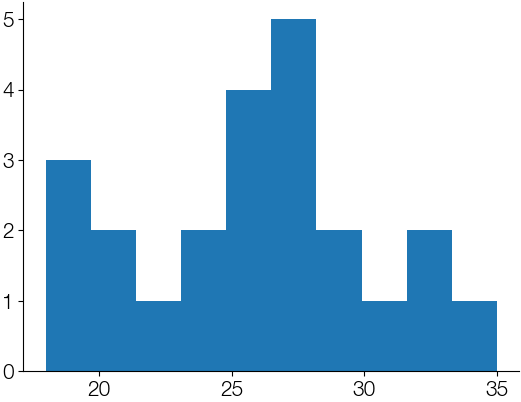

In [2]:
import matplotlib.pyplot as plt
values, edges, patches = plt.hist(age)
print(values)
print(edges)

This example uses Matplotlib, a commonly used library in Python for making many kinds of plots. It can be used to plot data stored in NumPy arrays.

If we don't specify bins, then the `hist` function will try to automatically find useful ones. We can also specify bins ourselves by indicating the edges of the bins. Here, we'll make bins that are two years wide.

[3. 2. 1. 4. 4. 5. 1. 2.]


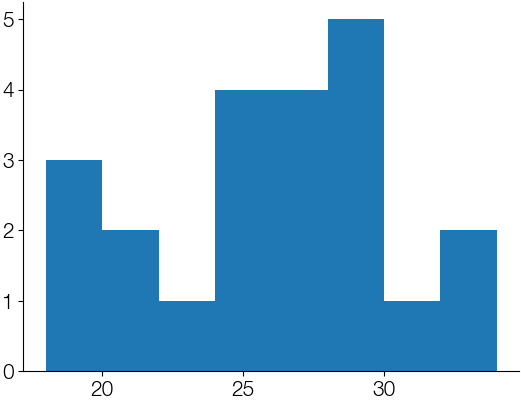

In [3]:
bins = np.arange(18, 36, step=2)
values, edges, patches = plt.hist(age, bins)
print(values)

### Exercise: making a histogram

Take the array of scores (created below using a random number generator) and plot a histogram. Make a histogram with the default edges, and a histogram that has bins 0–2, 2–4, 4–6, etc.

In [4]:
rng = np.random.default_rng(1)
scores = rng.normal(loc=10, scale=2, size=100)
# answer here

## Statistical distributions
Sometimes, we will have a good estimate of how some statistic, like height, varies across a large population of people. We'll use an estimate of how height varies in US adults by sex. Using data from the CDC, we'll calculate two numbers we need: the mean height and the standard deviation of the height.

In [5]:
# source: https://www.cdc.gov/nchs/data/series/sr_03/sr03-046-508.pdf
# US females and males aged 20 and over, 2015-2018
mf = 161.3
nf = 5510
semf = 0.19
stdf = semf * np.sqrt(nf) / 2  # correction factor needed for some reason
mm = 175.3
nm = 5092
semm = 0.19
stdm = semm * np.sqrt(nm) / 2

There are various tools in the SciPy Stats module that can be used to work with distributions. Here, we will use the *normal* distribution, a common shape of distribution that describes how real-world measures such as height and IQ vary across people. That is, there are a lot of people with a value near the mean, and the number of people with a given measure decreases with distance from the mean. In this example, we are plotting the *probability density function*, which gives the probability of observing people of different heights (in centimeters) for adults in the US.

Don't worry about the details of the code; the main point for now is to see how normal distributions look.

Female mean: 161.3, std: 7.1
Male mean: 175.3, std: 6.8


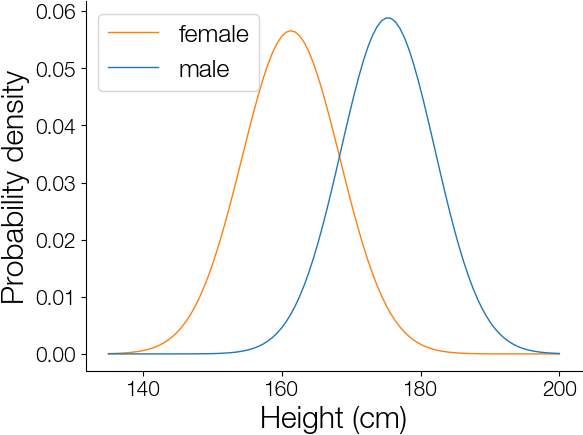

In [6]:
from scipy import stats
x = np.linspace(135, 200, 100)  # the range of heights to consider
pdff = stats.norm.pdf(x, loc=mf, scale=stdf)  # probability density function for female adults
pdfm = stats.norm.pdf(x, loc=mm, scale=stdm)  # probability density function for male adults
plt.plot(x, pdff, color="C1")
plt.plot(x, pdfm, color="C0")
plt.legend(["female", "male"])
plt.xlabel("Height (cm)")
plt.ylabel("Probability density");
print(f"Female mean: {mf}, std: {stdf:.1f}")
print(f"Male mean: {mm}, std: {stdm:.1f}")

Let's look more closely at one of the distributions. One way to think about a distribution is in terms of *percentiles*. A percentile $p$ is the point where $p$% of observations are greater.

Let's use SciPy to get an estimate of the 50th percentile of height for females. The 50th percentile is also called the *median*.

In [7]:
stats.norm.ppf(0.5, loc=mf, scale=stdf)

np.float64(161.3)

We can do the same for males.

In [8]:
stats.norm.ppf(0.5, loc=mm, scale=stdm)

np.float64(175.3)

We can look at a bunch of different percentiles to get a feel for how things vary.

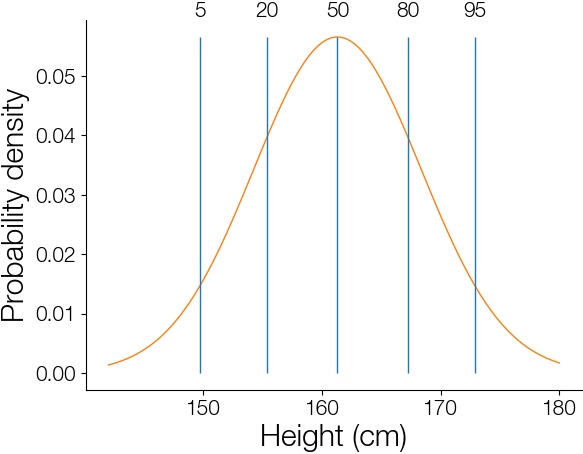

In [9]:
qs = [.05, .2, .5, .8, .95]
x = np.linspace(142, 180, 100)
pdff = stats.norm.pdf(x, loc=mf, scale=stdf)
perc = stats.norm.ppf(qs, loc=mf, scale=stdf)
plt.plot(x, pdff, color="C1")
plt.xlabel("Height (cm)")
plt.ylabel("Probability density")
plt.vlines(perc, 0, stats.norm.pdf(perc[2], loc=mf, scale=stdf))
for q, p in zip(qs, perc):
    plt.text(p, .06, f"{q * 100:.0f}", ha="center", fontsize="small")

From this graph, we can see different percentiles for height. The 5th percentile is around 150 cm, or about 4'11". The 95th percentile is around 173 cm, or about 5'8".

## Sample distributions
Before, we looked at a case where we had a good model of the distribution of heights across people, based on a large number of observations. Usually, we have some smaller number of samples and have to estimate this distribution. We can characterize the sample using what are called *descriptive statistics*.

We can use various NumPy functions to generate random data. We'll use this to demonstrate descriptive statistics. We'll get 10,000 samples from a normal distribution with a mean of 10 and a standard deviation of 2.

In [10]:
rng = np.random.default_rng(42)
x = rng.normal(loc=10, scale=2, size=10000)

As we saw before, we can visualize samples using a histogram.

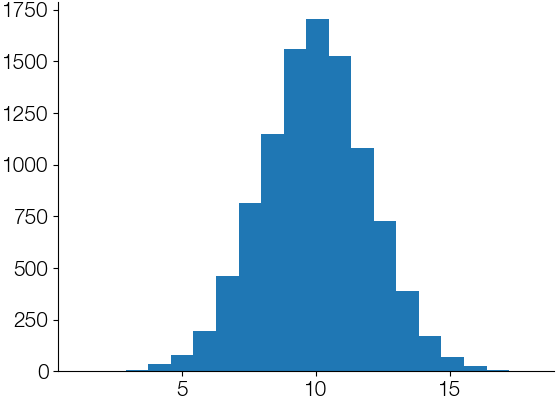

In [11]:
values, edges, patches = plt.hist(x, 20)

## Measures of central tendency

One simple question we can ask about a sample is what the *central tendency* of it is. We have seen the *mean* used before. It's calculated by summing up all the observations and dividing by the number of observations. 

The mean is defined as:

$$
\bar{x} = \frac{1}{N} \sum_{i}^{N} x_i
$$

where $x_i$ corresponds to each sample and $N$ is the number of observations.

We can calculate the mean using `np.mean`.

In [12]:
np.mean(x)

np.float64(9.979500249171977)

We can also calculate the *median*, which is the center observation after ranking the data, using `np.median`.

In [13]:
np.median(x)

np.float64(9.97366499315477)

We can visualize the mean and median by plotting them on the histogram.

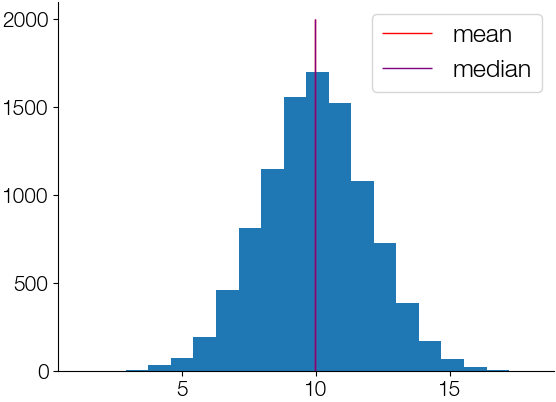

In [14]:
h = plt.hist(x, 20)
h1 = plt.vlines(np.mean(x), 0, 2000, color="red")
h2 = plt.vlines(np.median(x), 0, 2000, color="purple")
plt.legend([h1, h2], ["mean", "median"]);

Note that the mean and median are similar here. This is because the distribution is roughly symmetric.

Sometimes, data will have a *skew* to it, where it is not symmetric around the mean. Response time distributions have what's called a "long tail", where most responses are fast, but sometimes a response is much slower than usual.

For this example, we'll use an *exponentially modified normal* distribution to simulate a distribution of response times. NumPy doesn't support this distribution directly, so we'll use SciPy's Stats module instead. It has many distributions that are useful in science. Among other things, the `rvs` method of each distribution allows us to generate random samples from the distribution.

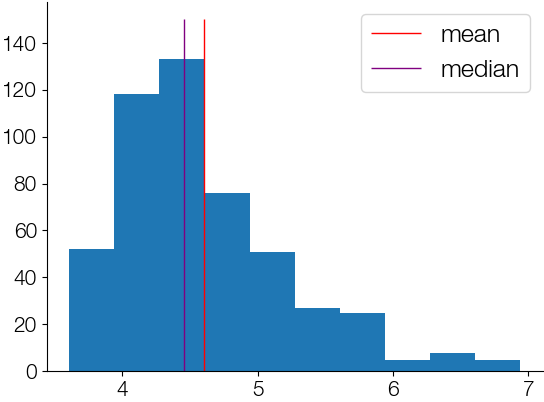

In [15]:
sim_response_time = stats.exponnorm.rvs(3, loc=4, scale=.2, size=500, random_state=42)
plt.hist(sim_response_time)
h1 = plt.vlines(np.mean(sim_response_time), 0, 150, color="red")
h2 = plt.vlines(np.median(sim_response_time), 0, 150, color="purple")
plt.legend([h1, h2], ["mean", "median"]);

Note that the median is further to the left, because it's based on the rank of the observations. The few very long response times don't affect it much. In contrast, the long response times do affect the mean, shifting it to the right. Sometimes, the median makes a better measure of central tendency, because it isn't as influenced by these *outliers*.

### Exercise: measures of central tendency

Take the randomly generated data array `y`, created below, and calculate the mean and median.

In [16]:
rng = np.random.default_rng(1)
y = rng.normal(loc=5, scale=3, size=1000)
# answer here

## Measures of spread

The other main measure we'll use measures the *spread* of the distribution. We know the mean of our distribution is around 10, but how much does each observation deviate from that? Are we likely to see a sample of 15? 20? The standard deviation basically measures the average distance of observations from the mean.

More specifically, it is defined as

$$
\sigma = \sqrt{\frac{1}{N - 1} \sum_{i=1}^{N} (x_i - \bar{x})^2}
$$

The spread of a distribution is an important property, which can be used to compare distributions. For example, two distributions might have the same mean but different standard deviations, indicating that one is more variable than the other.

2.876921114150091 1.017357424937711


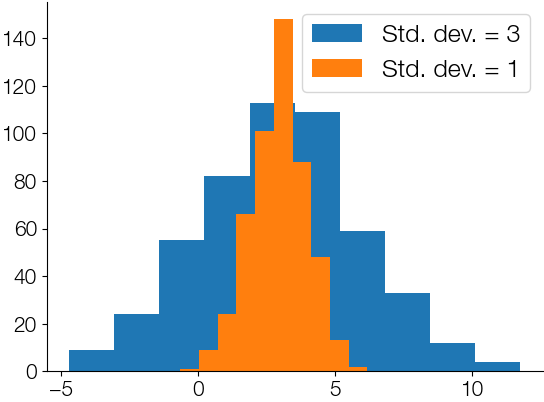

In [17]:
rng = np.random.default_rng(42)
d1 = rng.normal(loc=3, scale=3, size=500)
d2 = rng.normal(loc=3, scale=1, size=500)
_, _, h1 = plt.hist(d1)
_, _, h2 = plt.hist(d2)
plt.legend([h1, h2], ["Std. dev. = 3", "Std. dev. = 1"])
print(np.std(d1), np.std(d2))

One way to use the standard deviation is as a measure of how far away a sample is from the mean of the distribution. For example, we might look at one sample around 14, and say that it's more than two standard deviations above the mean.

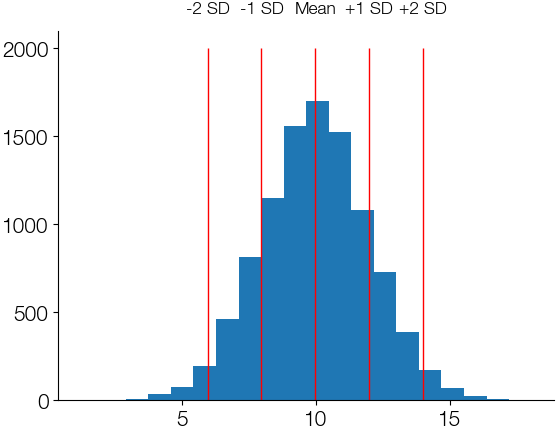

In [18]:
rng = np.random.default_rng(42)
x = rng.normal(loc=10, scale=2, size=10000)
m = np.mean(x)
sd = np.std(x)
h = plt.hist(x, 20)
vxs = [m - sd * 2, m - sd, m, m + sd, m + sd * 2]
vts = ["-2 SD", "-1 SD", "Mean", "+1 SD", "+2 SD"]
plt.vlines(vxs, 0, 2000, color="red")
for vx, vt in zip(vxs, vts):
    plt.text(vx, 2200, vt, ha="center", fontsize="x-small")

Another simple measure of the spread of a set of data is the *range* that it takes, which is defined as the maximum minus the minimum. We can get the maximum and minimum of a set of observations using the `np.min` and `np.max` functions.

In [19]:
x_min = np.min(x)
x_max = np.max(x)
x_range = x_max - x_min
print(f"Min: {x_min:.2f}; Max: {x_max:.2f}; Range: {x_range:.2f}")

Min: 1.22; Max: 18.05; Range: 16.83


Here, to make the output easier to look at, we use a feature of f-strings. By adding `:.2f` at the end, we indicate that the number should be printed out to two decimals.

### Exercise: measures of spread

Take the randomly generated data array `y`, created below, and calculate the standard deviation, minimum, maximum, and range.

In [20]:
rng = np.random.default_rng(1)
y = rng.normal(loc=5, scale=3, size=1000)
# answer here

## Percentiles
We can calculate percentiles to help us get a feel for how values vary across a sample distribution. We can calculate percentiles of an array using `np.percentile`.

In [21]:
rng = np.random.default_rng(42)
x = rng.normal(loc=10, scale=2, size=10000)
qs = [5, 20, 50, 80, 95]
perc = np.percentile(x, qs)
print(perc)

[ 6.65181303  8.30250363  9.97366499 11.64108528 13.28547999]


We'll visualize this using a histogram plot with lines to indicate where the percentiles are.

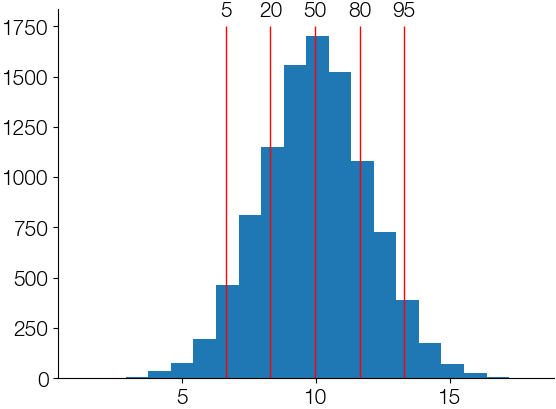

In [22]:
plt.hist(x, 20)
plt.vlines(perc, 0, 1750, color="red")
for q, p in zip(qs, perc):
    plt.text(p, 1800, f"{q}", ha="center", fontsize="small")

### Exercise: percentiles

Take the randomly generated data array `y`, created below, and calculate the 10th, 50th, and 90th percentiles.

In [23]:
rng = np.random.default_rng(1)
y = rng.normal(loc=5, scale=3, size=1000)
# answer here

## Missing data
Sometimes, we have some observations that are *missing*. For example, say we had two different psychology tasks that study participants completed, but some participants didn't complete the second study. In that case, their accuracy on the second task would be missing. NumPy arrays have a special value for representing missing data: `NaN`, which stands for not-a-number. We can assign this value to part of an array by using the special value `np.nan`.

In [24]:
participant_ids = np.array(["001", "002", "003", "004", "005", "006"])
accuracy1 = np.array([0.87, 0.68, 0.49, 0.57, 0.72, 0.51])
accuracy2 = np.array([0.72, 0.54, np.nan, 0.48, np.nan, 0.82])

There are special rules for `NaN` values. Generally, any operation that includes a `NaN` will result in `NaN`.

In [25]:
print(np.nan + 4)
print(np.nan * 2)
print(np.nan == np.nan)

nan
nan
False


Notice that last rule; `NaN` isn't equal to anything, even another `NaN`!

We can check for a `NaN` using special functions. The `np.isnan` function will check each element of an array and tell us what is `NaN`.

In [26]:
a = np.array([1, 2, 3, np.nan])
np.isnan(a)

array([False, False, False,  True])

If we want to reverse this, to get the non-`NaN` elements, we can use the not (`~`) operator.

In [27]:
a[~np.isnan(a)]

array([1., 2., 3.])

Why would we want to have such a strange thing as `NaN` values in our variables? Because it lets us indicate a placeholder when a datapoint is missing, and keeps us from making a mistake when using placeholder values in calculations. If I don't know what value a variable would have had, because I didn't actually measure it, then I also don't know the results of calculations with that variable.

For example, if I did not record the accuracy score of one of three participants, then I have no way of calculating their mean accuracy. Python will tell me that their mean accuracy is `NaN`, as it should.

In [28]:
accuracy1 = 7
accuracy2 = np.nan
accuracy3 = 9
(accuracy1 + accuracy2 + accuracy3) / 3

nan

There is another question that I could ask, though; what is the average accuracy, excluding missing values? NumPy has special functions that work this way, making calculations that only include the defined values in an array, ignoring `NaN` values. These functions have the same names as the usual functions, but with `nan` in front of them.

In [29]:
accuracy = np.array([accuracy1, accuracy2, accuracy3])
print(np.mean(accuracy))
print(np.nanmean(accuracy))

nan
8.0


Keep in mind that this isn't quite the same thing as a normal mean. We're just ignoring the score for the second participant, acting like it doesn't exist, and using the scores for the first and third participants. Often that will be useful to know, but by default NumPy will just tell you that the answer is `NaN`, because there's no way to know what the mean would really be without knowing the value of all the samples going into that mean.

### Exercise: missing data

Define an array with memory scores: 12, 15, 11, n/a, 9, n/a, n/a. The scores that are "n/a" are missing; use `NaN` to indicate those missing scores.

Use NumPy functions to calculate the number of missing scores. Then calculate the mean and median with the missing scores excluded.

In [30]:
# answer here